# Projet 10 : Détectez des faux billets
-----
## 1 Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-----
## 2 Chargement des données

In [2]:
data = pd.read_csv('billets.csv', sep = ';', decimal = '.')
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


On affiche le nombre de lignes et de colonnes.

In [3]:
data.shape

(1500, 7)

-----
## 3 Nettoyage et préparation des données
### 3.1 Vérification du types de données

In [4]:
data.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

Pas d'erreurs

### 3.2 Vérification des doublons

In [5]:
data.duplicated().sum()

0

### 3.3 Vérification des valeurs manquantes

In [6]:
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

37 Valeurs manquantes dans la colonnes "margin_low".

On fait une régression linéaire multiple pour calculer les valeurs manquantes.

### 3.4 Régression linéaire
On importe d'abord les librairies.

In [7]:
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [8]:
reg_multi = smf.ols('margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up + length', data = data).fit()
print (reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          4.75e-299
Time:                        14:22:51   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

Certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

On retire les variables non significatives. On commence par la moins significative 'diagonal' car sa p-value = 0.71

In [9]:
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + height_right + margin_up + length', data = data).fit()
print (reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          2.23e-300
Time:                        14:22:51   Log-Likelihood:                -774.20
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7806      6

C'est maintenant 'length', avec une p-valeur de 0.88, qui est la moins significative. On la retire.

In [10]:
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + height_right + margin_up', data = data).fit()
print (reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          8.76e-302
Time:                        14:22:51   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

On retire 'height_right' qui a une p-valeur de 0.5.

In [11]:
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + margin_up', data = data).fit()
print (reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          3.63e-303
Time:                        14:22:51   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

On retire 'height_left' qui a une p-valeur de 0.45.

In [12]:
reg_multi = smf.ols('margin_low ~ is_genuine + margin_up', data = data).fit()
print (reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.24e-304
Time:                        14:22:51   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

Tous les paramètres sont significatifs (p-values proches de 0). Quant au $R^{2}$, il vaut environ 0.62, tout comme le $R^{2}$ ajusté. On peut utiliser ce modèle à des fins de prévision.

In [13]:
# On crée un dataframe avec les 2 paramètres
model_var = data[['is_genuine', 'margin_up']].copy()

# On crée la variable de la prédiction via la méthode 'predict'
margin_low_prev = reg_multi.predict(model_var)

# On remplace les valeurs manquantes par la valeur prédite
data['margin_low'].fillna(margin_low_prev, inplace = True)

# On vérifie les valeurs manquantes
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Nous n'avons plus de valeurs manquantes.

-----
## 4 Analyse exploratoire : vrais VS faux billets
On convertit les valeurs booléennes en string pour utiliser des fonctions.

In [14]:
str_genui_data = data.copy()
str_genui_data['is_genuine'] = str_genui_data['is_genuine'].map({True: 'True', False : 'False'})
str_genui_data.dtypes

is_genuine       object
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

### 4.1 Diagonale

Text(0, 0.5, 'Type de billets')

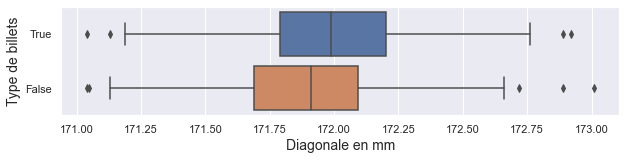

In [15]:
sns.set()

plt.figure(figsize=(10, 2))
sns.boxplot(x= "diagonal", 
            y= "is_genuine",
            data= str_genui_data);
plt.xlabel('Diagonale en mm', fontsize = 14)
plt.ylabel('Type de billets', fontsize = 14)

### 4.3 Hauteur gauche

Text(0, 0.5, 'Type de billets')

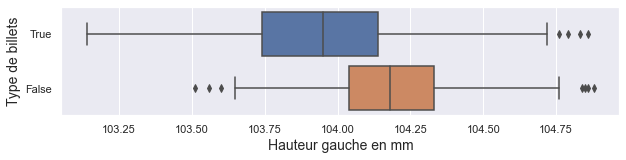

In [16]:
plt.figure(figsize=(10, 2))
sns.boxplot(x= "height_left", 
            y= "is_genuine",
            data= str_genui_data);
plt.xlabel('Hauteur gauche en mm', fontsize = 14)
plt.ylabel('Type de billets', fontsize = 14)

### 4.4 Hauteur droite

Text(0, 0.5, 'Type de billets')

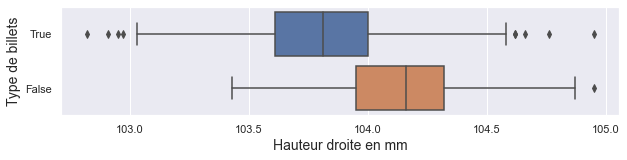

In [17]:
plt.figure(figsize=(10, 2))
sns.boxplot(x= "height_right", 
            y= "is_genuine",
            data= str_genui_data);
plt.xlabel('Hauteur droite en mm', fontsize = 14)
plt.ylabel('Type de billets', fontsize = 14)

### 4.5 Marge du bas

Text(0, 0.5, 'Type de billets')

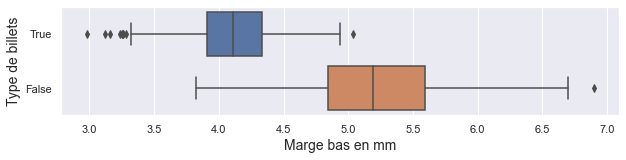

In [18]:
plt.figure(figsize=(10, 2))
sns.boxplot(x= "margin_low", 
            y= "is_genuine",
            data= str_genui_data);
plt.xlabel('Marge bas en mm', fontsize = 14)
plt.ylabel('Type de billets', fontsize = 14)

### 4.6 Marge haut

Text(0, 0.5, 'Type de billets')

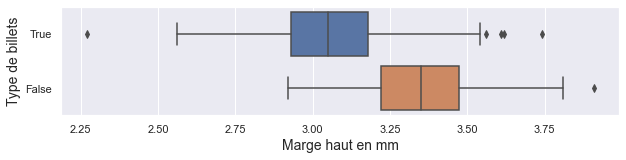

In [19]:
plt.figure(figsize=(10, 2))
sns.boxplot(x= "margin_up", 
            y= "is_genuine",
            data= str_genui_data);
plt.xlabel('Marge haut en mm', fontsize = 14)
plt.ylabel('Type de billets', fontsize = 14)

### 4.7 Longueur

Text(0, 0.5, 'Type de billets')

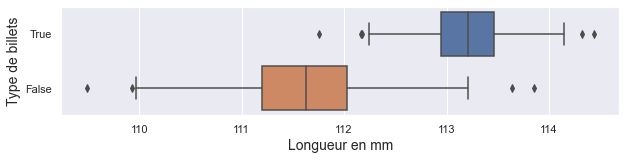

In [20]:
plt.figure(figsize=(10, 2))
sns.boxplot(x= "length", 
            y= "is_genuine",
            data= str_genui_data);
plt.xlabel('Longueur en mm', fontsize = 14)
plt.ylabel('Type de billets', fontsize = 14)

-----
## 5 Algorithmes de détection
### 5.1 Régression logistique
On effectue une régression logistique de 'is_genuine'.

On importe d'abord les librairies.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression

#### 5.1.1 Préparation des données
On crée un dataframe où les valeurs de 'is_genuine' sont convertis en nombres entiers.

In [22]:
int_genui_data = str_genui_data.copy()
int_genui_data['is_genuine'] = int_genui_data['is_genuine'].map({'True': 0, 'False' : 1})
int_genui_data.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

On sépare x, la variable à expliquer et y, les variables explicatives.

In [23]:
X = int_genui_data.drop(columns = "is_genuine")
y = int_genui_data.is_genuine

#### 5.1.2 Partage de l'échantillon pour le test et l'entraînement
On spécifie le % de données que nous voulons par rapport au train (20 % dans le test et 80 % dans le train) et le random_state (la fonction s'éxécute toujours de la même façon et passe toujours le même split).

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# On vérifie leur forme
print (f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape} ")
print (f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape} ")

Nous avons X_train de forme (1200, 6) et y_train de forme (1200,) 
Nous avons X_test de forme (300, 6) et y_test de forme (300,) 


#### 5.1.3 Entraînement du modèle
On instancie un estimateur, c'est-à-dire l'algorithme qui va permettre de comprendre quel modèle utiliser dans les données.

In [25]:
estimator = LogisticRegression(solver = 'liblinear')

# On entraîne l'estimateur
estimator.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

On calcule notre vecteur de prédiction.

In [26]:
y_pred = estimator.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

La régression logistique (estimator = LogisticRegression(solver = 'liblinear')) peut également nous permettre d'évaluer la probabilité d'appartenance à une classe.

On appelle la méthode predict_proba.

In [27]:
y_prob = estimator.predict_proba(X_test).round(2)
y_prob[:10]

array([[0.  , 1.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ]])

On a une matrice à 2 colonnes où chaque colonne représente la probabilité/confiance du modèle que tel individu appartient à telle classe.

Exemple : pour le 1er individu, le modèle estime à 0% la probabilité d'appartenir à la classe 0 et 100% la probabilité d'appartenir à la classe 1.

Pour le 2ème individu, c'est 0.1% d'appartenance à la classe 0 et 0.99% d'appartenance à la classe 1.

On calcule 2 scores: la performance de l'estimateur sur les données de train et de test.

In [28]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print (f"score train : {tr_score} score test : {te_score}")

score train : 0.9908 score test : 0.99


Nos scores ont 99% d'accuracy sur le train et sur le test. Nos modèles fonctionnent bien.

En général, le score de train est meilleur que le score de test.

D'autres scores seront calculés (pour le k-means), on fait une fonction score.

In [29]:
# la fonction s'appelle score et prend en argument un estimateur
def score(estimator) :
    # les 3 guillements référencent une docstring et laisse une indication sur ce que fait la fonction
    """compute and print train scrore and test score"""
    
    # On copie-colle la cellule précédente
    tr_score = estimator.score(X_train, y_train).round(4)
    te_score = estimator.score(X_test, y_test).round(4)
    
    print (f"score train : {tr_score} score test : {te_score} ")

On teste la fonction.

In [30]:
score(estimator)

score train : 0.9908 score test : 0.99 


#### 5.1.4 Test du modèle
On veut tester la qualité de notre modèle en comparant les données réelles pour une variable cible à celles prédites par le modèle.

On utilise une matrice de confusion (tableau de contingence) qu'on appelle sur y_test et y_pred et on regarde les différences entre les valeurs pred_1 (en réalité 0) ou les valeurs pred_0 (en réalité 1).

In [31]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[190,   0],
       [  3, 107]], dtype=int64)

On transforme la matrice en dataframe et on renomme les colonnes et les index.

In [32]:
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,190,0
test_1,3,107


La matrice nous montre que:
- sur la valeur 0, on a prédit 190 fois la valeur 0 et 0 fois la valeur 1;
- sur la valeur 1, on a prédit 3 fois la valeur 0 et 107 fois la valeur 1.

D'autres matrices de confusion seront utilisées (pour le k-means), on créé une fonction 'confusion'.

In [33]:
def confusion (y_test, y_pred) :
    """ display a fancy confusion matrix"""
    
    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]
    
    return mat

On teste la fonction.

In [34]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,190,0
test_1,3,107


On calcule le rappel, la précision, le F1 score...

In [35]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.99


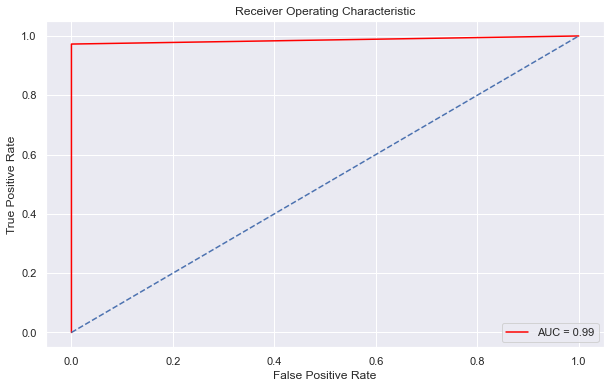

In [36]:
plt.figure(figsize = (10, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color ='red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.2 K-means
On importe d'abord les librairies.

In [37]:
from sklearn.cluster import KMeans

#### 5.2.1 Nombre de clusters
On définit le nombre de clusters par la méthode du coude.

In [38]:
# On stocke nos inerties
intertia = []

# On définit la liste du nombre de clusters que l'on veut tester, soit 10
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie
for i in k_list :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X) 
    intertia.append(kmeans.inertia_)

# La liste d'inerties
intertia

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[2307.9351897628126,
 969.5337101530758,
 860.1217965033517,
 771.8253888246994,
 709.7242485215451,
 665.6989841107157,
 629.1554193847675,
 594.6097005887084,
 571.4652637633998]

On affiche le graphique de l'inertie intraclasse selon le nombre de clusters.

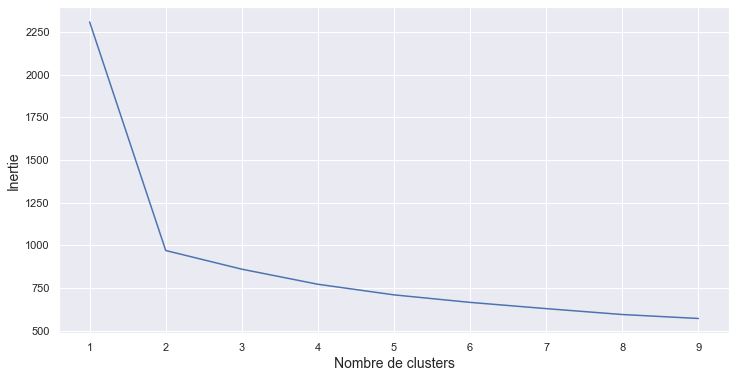

In [40]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Inertie", fontsize = 14)
ax.set_xlabel("Nombre de clusters", fontsize = 14)
ax = plt.plot(k_list, intertia)

On a une cassure à 2 clusters.
#### 5.2.2 Clusters

In [41]:
# On entraîne l'estimateur
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train, y_train)

KMeans(n_clusters=2)

In [42]:
# On stocke les labels dans une variable
labels = kmeans.labels_
labels

array([0, 0, 1, ..., 0, 1, 1])

#### 5.2.3 Entraînement du modèle
On fait une prédiction sur X_test.

In [43]:
prediction = kmeans.predict(X_test)

pred_df = pd.DataFrame({'actual' : y_test, 'prediction' : prediction})

print (pred_df)

      actual  prediction
1116       1           1
1368       1           1
422        0           0
413        0           0
451        0           0
...      ...         ...
983        0           0
799        0           0
1265       1           1
1150       1           1
824        0           0

[300 rows x 2 columns]


In [44]:
# On réinitialise l'index d'y_test pour pouvoir faire des calculs sur le nombre d'individus et la précision
y_test = y_test.reset_index(drop=True)

correct = 0

for i in range(len(y_test)):
    if prediction[i] == y_test[i]:
        correct += 1
        
print(correct/len(y_test))

0.98


Nous avons 98% d'accuracy.
#### 5.2.4 Test du modèle
On fait une matrice de confusion qu'on apelle sur les valeurs réelles 'y' et et les valeurs prédites 'prediction'.

In [45]:
kmeans_mat = confusion_matrix(y_test, prediction)
kmeans_mat

array([[190,   0],
       [  6, 104]], dtype=int64)

On transforme la matrice en dataframe et on renomme les colonnes et les index.

In [46]:
kmeans_mat = pd.DataFrame(kmeans_mat)
kmeans_mat.columns = [f"pred_{i}" for i in kmeans_mat.columns]
kmeans_mat.index = [f"test_{i}" for i in kmeans_mat.index]
kmeans_mat

,pred_0,pred_1
test_0,190,0
test_1,6,104


Les résultats sont légèrements moins bons que ceux de la régression logistique.

-----
## 5 Application du modèle
On applique le modèle choisi (régression logistique) sur le dataset 'billets_productions'.

On charge les données.

In [47]:
prod_data = pd.read_csv('billets_production.csv')
print (prod_data.shape)
prod_data.head()

(5, 7)


,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


On supprime la colonne 'id' pour pouvoir utiliser notre modèle.

In [48]:
prod_data = prod_data.drop(columns = 'id')
prod_data

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


On applique notre modèle sur les données.

In [49]:
prod_genui = estimator.predict(prod_data)
prod_genui

array([1, 1, 1, 0, 0], dtype=int64)

On ajoute nos résultats au dataframe.

In [50]:
# On crée une variable des résultats
prod_data["is_genuine"] = prod_genui

# On convertit les résultats en valeur booléenne
prod_data.is_genuine = ~prod_data.is_genuine.astype('bool')

prod_data

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,False
1,171.87,104.17,104.13,6.00,3.31,112.09,False
2,172.00,104.58,104.29,4.99,3.39,111.57,False
3,172.49,104.55,104.34,4.44,3.03,113.20,True
4,171.65,103.63,103.56,3.77,3.16,113.33,True


Sur les 5 billets, d'après notre modèle nous avons 3 faux billets.